In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [ ]:
df_train.head()

name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner     mileage   engine   max_power  \
0  Individual       Manual   First Owner   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual  Second Owner  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual   First Owner   23.0 kmpl  1396 CC      90 bhp   
3  Individual       Manual   First Owner   16.1 kmpl  1298 CC    88.2 bhp   
4  Individual       Manual   First Owner  20.14 kmpl  1197 CC   81.86 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2  22.4 kgm at 1750-2750rpm    5.0  
3     11.5@ 4,500(kgm@ rpm)    5.0  
4         113.75nm@ 4000rpm    5.0

In [ ]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

есть пропуски в колонках mileage, engine, max_power, torque, seats




In [ ]:
df_train.duplicated().sum() #985 явных дублей

985

In [ ]:
df_train.drop_duplicates(inplace=True) #сразу удалим дубли, они нам точно не понадобятся

In [ ]:
pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 79.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3d56d47bd4ed20bdc3b1646bf5272ffe59555bf17408d3e5ab684ab88d09f3d5
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title="Profiling Report")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Основные выводы:
1. 13 признаков
2. 6014 наблюдений в трейне
3. 1.2% данных - пропуски
4. сильная отрицательная корреляция между годом выпуска автомобиля и пробегом, между ценой и пробегом
5. сильная положительная корреляция между ценой и годом выпуска
**Особенности распределения признаков в датасете**:
1.   km_driven сильно коррелирует с year
2.   selling_price в целом сильно коррелирует с year
3.   дисбаланс классов у seller_type, transmission
4.   есть пропуски в mileage, engine, max_power, torque, seats
5.   логнормальное распределение таргета, а также переменной km_driven



In [ ]:
df_train.describe()

year  selling_price     km_driven        seats
count  6014.000000   6.014000e+03  6.014000e+03  5824.000000
mean   2013.447456   5.219820e+05  7.376415e+04     5.437672
std       4.079920   5.338426e+05  5.961075e+04     0.991755
min    1983.000000   2.999900e+04  1.000000e+00     2.000000
25%    2011.000000   2.500000e+05  3.900000e+04     5.000000
50%    2014.000000   4.099990e+05  7.000000e+04     5.000000
75%    2017.000000   6.400000e+05  1.000000e+05     5.000000
max    2020.000000   1.000000e+07  2.360457e+06    14.000000

In [ ]:
df_test.describe()

year  selling_price      km_driven       seats
count  1000.000000   1.000000e+03    1000.000000  981.000000
mean   2013.681000   6.179010e+05   71393.341000    5.410805
std       4.012149   7.585539e+05   48486.218662    0.919985
min    1995.000000   3.100000e+04    1303.000000    4.000000
25%    2011.000000   2.500000e+05   37000.000000    5.000000
50%    2014.000000   4.349990e+05   61500.000000    5.000000
75%    2017.000000   6.700000e+05  100000.000000    5.000000
max    2020.000000   6.000000e+06  375000.000000    9.000000



*   средние и медианные значения в трейне и в тесте различаются в рамках погрешности (не сильно), что говорит нам о том, что распределения в трейне и тесте близки (хороший знак))

In [ ]:
df_train.describe(include=['O'])

name    fuel seller_type transmission        owner  \
count                     6014    6014        6014         6014         6014   
unique                    1924       4           3            2            5   
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner   
freq                       107    3269        5394         5505         3721   

          mileage   engine max_power          torque  
count        5824     5824      5827            5823  
unique        386      120       316             419  
top     18.9 kmpl  1248 CC    74 bhp  190Nm@ 2000rpm  
freq          184      795       282             417

In [ ]:
df_test.describe(include=['O'])

name    fuel seller_type transmission        owner  \
count                  1000    1000        1000         1000         1000   
unique                  621       4           3            2            5   
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner   
freq                     15     534         837          877          623   

          mileage   engine max_power          torque  
count         981      981       981             981  
unique        237       88       182             226  
top     18.6 kmpl  1248 CC    74 bhp  200Nm@ 1750rpm  
freq           23      116        43              57

In [ ]:
df_train.drop(columns=['selling_price']).duplicated().sum()

174

In [ ]:
df_train[df_train.drop(columns=['selling_price']).duplicated()]

name  year  selling_price  \
268                     Maruti Swift Dzire VXI  2014         400000   
370                 BMW X4 M Sport X xDrive20d  2019        5400000   
444                        Maruti Alto 800 VXI  2016         270000   
766                   Chevrolet Beat Diesel LT  2012         200000   
1000                           Maruti Alto LXI  2005          80000   
...                                        ...   ...            ...   
6815                    Datsun RediGO T Option  2016         200000   
6891                       Maruti Alto 800 LXI  2017         270000   
6906                          Maruti Swift VDI  2012         416000   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   

      km_driven    fuel seller_type transmission         owner     mileage  \
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
370        7500  Diesel      Dealer    Automatic   First Owner  16.78 kmpl   
444       50000  Petrol  Individual       Manual   First Owner  22.74 kmpl   
766       70000  Diesel  Individual       Manual  Second Owner  25.44 kmpl   
1000      40000  Petrol  Individual       Manual  Second Owner   19.7 kmpl   
...         ...     ...         ...          ...           ...         ...   
6815      35000  Petrol  Individual       Manual   First Owner   22.7 kmpl   
6891      35000  Petrol  Individual       Manual   First Owner   24.7 kmpl   
6906      90000  Diesel  Individual       Manual  Second Owner   22.9 kmpl   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   

       engine  max_power               torque  seats  
268   1197 CC   85.8 bhp       114Nm@ 4000rpm    5.0  
370   1995 CC    190 bhp  400Nm@ 1750-2500rpm    5.0  
444    796 CC   47.3 bhp        69Nm@ 3500rpm    5.0  
766    936 CC   57.6 bhp       150Nm@ 1750rpm    5.0  
1000   796 CC   46.3 bhp        62Nm@ 3000rpm    5.0  
...       ...        ...                  ...    ...  
6815   799 CC  53.64 bhp        72Nm@ 4386rpm    5.0  
6891   796 CC   47.3 bhp        69Nm@ 3500rpm    5.0  
6906  1248 CC     74 bhp       190Nm@ 2000rpm    5.0  
6947   995 CC     62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC  98.63 bhp  215Nm@ 1750-3000rpm    5.0  

[174 rows x 13 columns]

In [ ]:
df_train.drop_duplicates(subset=[col for col in df_train.columns if col != 'selling_price'], keep='first', inplace=True)

In [ ]:
df_train.reset_index(drop=True, inplace=True)

In [ ]:
assert df_train.shape == (5840, 13)

In [ ]:
import re

In [ ]:
df_train[['mileage', 'engine', 'max_power']]

mileage   engine   max_power
0      23.4 kmpl  1248 CC      74 bhp
1     21.14 kmpl  1498 CC  103.52 bhp
2      23.0 kmpl  1396 CC      90 bhp
3      16.1 kmpl  1298 CC    88.2 bhp
4     20.14 kmpl  1197 CC   81.86 bhp
...          ...      ...         ...
5835  17.92 kmpl  1086 CC    62.1 bhp
5836   18.9 kmpl   998 CC    67.1 bhp
5837   18.5 kmpl  1197 CC   82.85 bhp
5838   16.8 kmpl  1493 CC     110 bhp
5839   19.3 kmpl  1248 CC    73.9 bhp

[5840 rows x 3 columns]

In [ ]:
def preprocess_columns(data, columns):
  for column in columns:
    data[column] = data[column].apply(lambda x: float(re.search(r'\d+(\.\d+)?', x).group(0)) if isinstance(x, str) and re.search(r'\d+(\.\d+)?', x) else None)

In [ ]:
columns_to_preprocess = ['mileage', 'engine', 'max_power']
for dataset in [df_train, df_test]:
    preprocess_columns(dataset, columns_to_preprocess)

In [ ]:
df_train[['mileage', 'engine', 'max_power']]

mileage  engine  max_power
0       23.40  1248.0      74.00
1       21.14  1498.0     103.52
2       23.00  1396.0      90.00
3       16.10  1298.0      88.20
4       20.14  1197.0      81.86
...       ...     ...        ...
6992    17.92  1086.0      62.10
6993    18.90   998.0      67.10
6994    18.50  1197.0      82.85
6995    16.80  1493.0     110.00
6996    19.30  1248.0      73.90

[5840 rows x 3 columns]

In [ ]:
df_test[['mileage', 'engine', 'max_power']]

mileage  engine  max_power
0      14.00  2498.0     112.00
1      21.50  1497.0     108.50
2      12.90  1799.0     130.00
3      25.10  1498.0      98.60
4      16.50  1172.0      65.00
..       ...     ...        ...
995    19.81  1086.0      68.05
996    18.60  1197.0      81.83
997    23.00  1396.0      90.00
998    20.36  1197.0      78.90
999    26.00  1498.0      98.60

[1000 rows x 3 columns]

In [ ]:
def extract_max_torque_rpm(torque_str):
    if isinstance(torque_str, str):

        rpm_pattern = r'@?\s*([\d,]+)\s*\(?(?:kgm@)?\s*rpm\)?'
        rpm_match = re.search(rpm_pattern, torque_str)

        if rpm_match:
            return int(rpm_match.group(1).replace(",", ""))

    return None

In [ ]:
df_train['max_torque_rpm'] = df_train['torque'].apply(extract_max_torque_rpm)
df_train['max_torque_rpm']

0       2000.0
1       2500.0
2       2750.0
3       4500.0
4       4000.0
         ...  
6992    3000.0
6993    3500.0
6994    4000.0
6995    2750.0
6996    2000.0
Name: max_torque_rpm, Length: 5840, dtype: float64

In [ ]:
df_test['max_torque_rpm'] = df_test['torque'].apply(extract_max_torque_rpm)
df_test['max_torque_rpm']

0      2200.0
1      2750.0
2      4300.0
3      1750.0
4      3000.0
        ...  
995    4500.0
996    4000.0
997    2750.0
998    4000.0
999    1750.0
Name: max_torque_rpm, Length: 1000, dtype: float64

In [ ]:
def extract_and_convert_torque_value(torque_str):
    if isinstance(torque_str, str):

        value_pattern = r'(\d+\.\d+|\d+)\s*(kgm|nm|Nm)?\s*(?:@|at|\()'

        value_match = re.search(value_pattern, torque_str, re.IGNORECASE)
        if value_match:

            value = float(value_match.group(1))
            unit = value_match.group(2)

            if unit and unit.lower() == 'kgm' or 'kgm' in torque_str.lower():
                value *= 9.81

            return value

    return None

In [ ]:
df_train['torque'] = df_train['torque'].apply(extract_and_convert_torque_value)
df_train['torque']

0       190.000
1       250.000
2       219.744
3       112.815
4       113.750
         ...   
6992     96.100
6993     90.000
6994    113.700
6995    235.440
6996    190.000
Name: torque, Length: 5840, dtype: float64

In [ ]:
df_test['torque'] = df_test['torque'].apply(extract_and_convert_torque_value)
df_test['torque']

0      260.000
1      260.000
2      172.000
3      200.000
4       96.000
        ...   
995     99.040
996    114.700
997    219.744
998    111.800
999    200.000
Name: torque, Length: 1000, dtype: float64

In [ ]:
from sklearn import impute

In [ ]:
df_train.dtypes

name               object
year                int64
selling_price       int64
km_driven           int64
fuel               object
seller_type        object
transmission       object
owner              object
mileage           float64
engine            float64
max_power         float64
torque            float64
seats             float64
max_torque_rpm    float64
dtype: object

In [ ]:
cat_features_mask = (df_train.dtypes == "object").values
cat_features_mask

array([ True, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False, False])

In [ ]:
df_train[df_train.columns[~cat_features_mask]].columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm'],
      dtype='object')

In [ ]:
df_train[df_train.columns[cat_features_mask]].columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [ ]:
X_real = df_train[df_train.columns[~cat_features_mask]]
mis_replacer = impute.SimpleImputer(strategy="mean")
X_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(X_real), columns=X_real.columns)

X_cat = df_train[df_train.columns[cat_features_mask]].fillna("NA")
X_cat.reset_index(drop=True, inplace=True)

df_train = pd.concat([X_no_mis_real, X_cat], axis=1)

In [ ]:
assert df_train.isnull().sum().sum() == 0, "остались пропуски в трейне"

In [ ]:
X_real = df_test[df_test.columns[~cat_features_mask]]
X_no_mis_real = pd.DataFrame(data=mis_replacer.transform(X_real), columns=X_real.columns)

X_cat = df_test[df_test.columns[cat_features_mask]].fillna("NA")
X_cat.reset_index(drop=True, inplace=True)

df_test = pd.concat([X_no_mis_real, X_cat], axis=1)

In [ ]:
assert df_test.isnull().sum().sum() == 0, "остались пропуски в тесте"

In [ ]:
cat_features_mask = (df_train.dtypes == "object").values
cat_features_mask

array([False, False, False, False, False, False, False, False, False,
        True,  True,  True,  True,  True])

Почему медиана? она устойчива к выбросам, лучше отражает распределение данных при аномалиях (например длинный хвост). можно использовать и среднее, если у признаков распределение, близкое к нормальному + нет выбросов

По тренировочным данным для train и test

In [ ]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [ ]:
df_test['seats'].nunique()

6

In [ ]:
df_train['seats'].nunique()

9

Переменную seats можно рассматривать как категориальную хотя бы потому что у нее всего 9 уникальных значений + в контексте анализа авто кол-во сидений скорее категории, чем точки на числовой прямлй

In [ ]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power       torque        seats  max_torque_rpm  
count  5840.000000  5840.000000  5840.000000     5840.000000  
mean     87.906371   175.711603     5.426712     3042.458562  
std      31.640418   116.627950     0.982344      914.681210  
min       0.000000    47.088000     2.000000      500.000000  
25%      68.000000   111.800000     5.000000     2250.000000  
50%      81.860000   160.000000     5.000000     3000.000000  
75%      99.000000   200.000000     5.000000     4000.000000  
max     400.000000  3727.800000    14.000000    21800.000000

In [ ]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power       torque        seats  max_torque_rpm  
count  1000.000000  1000.000000  1000.000000     1000.000000  
mean     90.841670   176.581834     5.403000     3089.726000  
std      34.893389   102.583437     0.912921      882.156903  
min      34.200000    48.000000     4.000000      500.000000  
25%      69.000000   111.700000     5.000000     2500.000000  
50%      82.425000   160.000000     5.000000     3000.000000  
75%     102.000000   205.000000     5.000000     4000.000000  
max     280.000000  1422.450000     9.000000     5200.000000

Заполнение пропусков незначительно сдвинуло наши распределения. это могло бы возникнуть в большей мере, если бы пропусков было оч много + при наличии большого колва выбросов

In [ ]:
df_train.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm', 'name', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

связь с целевой переменной: year, km_driven, max_power
***
корреляция: torque и engine, torque и max_power, engine и max_power, selling_price и km_driven, selling_price и year, selling_price и max_power

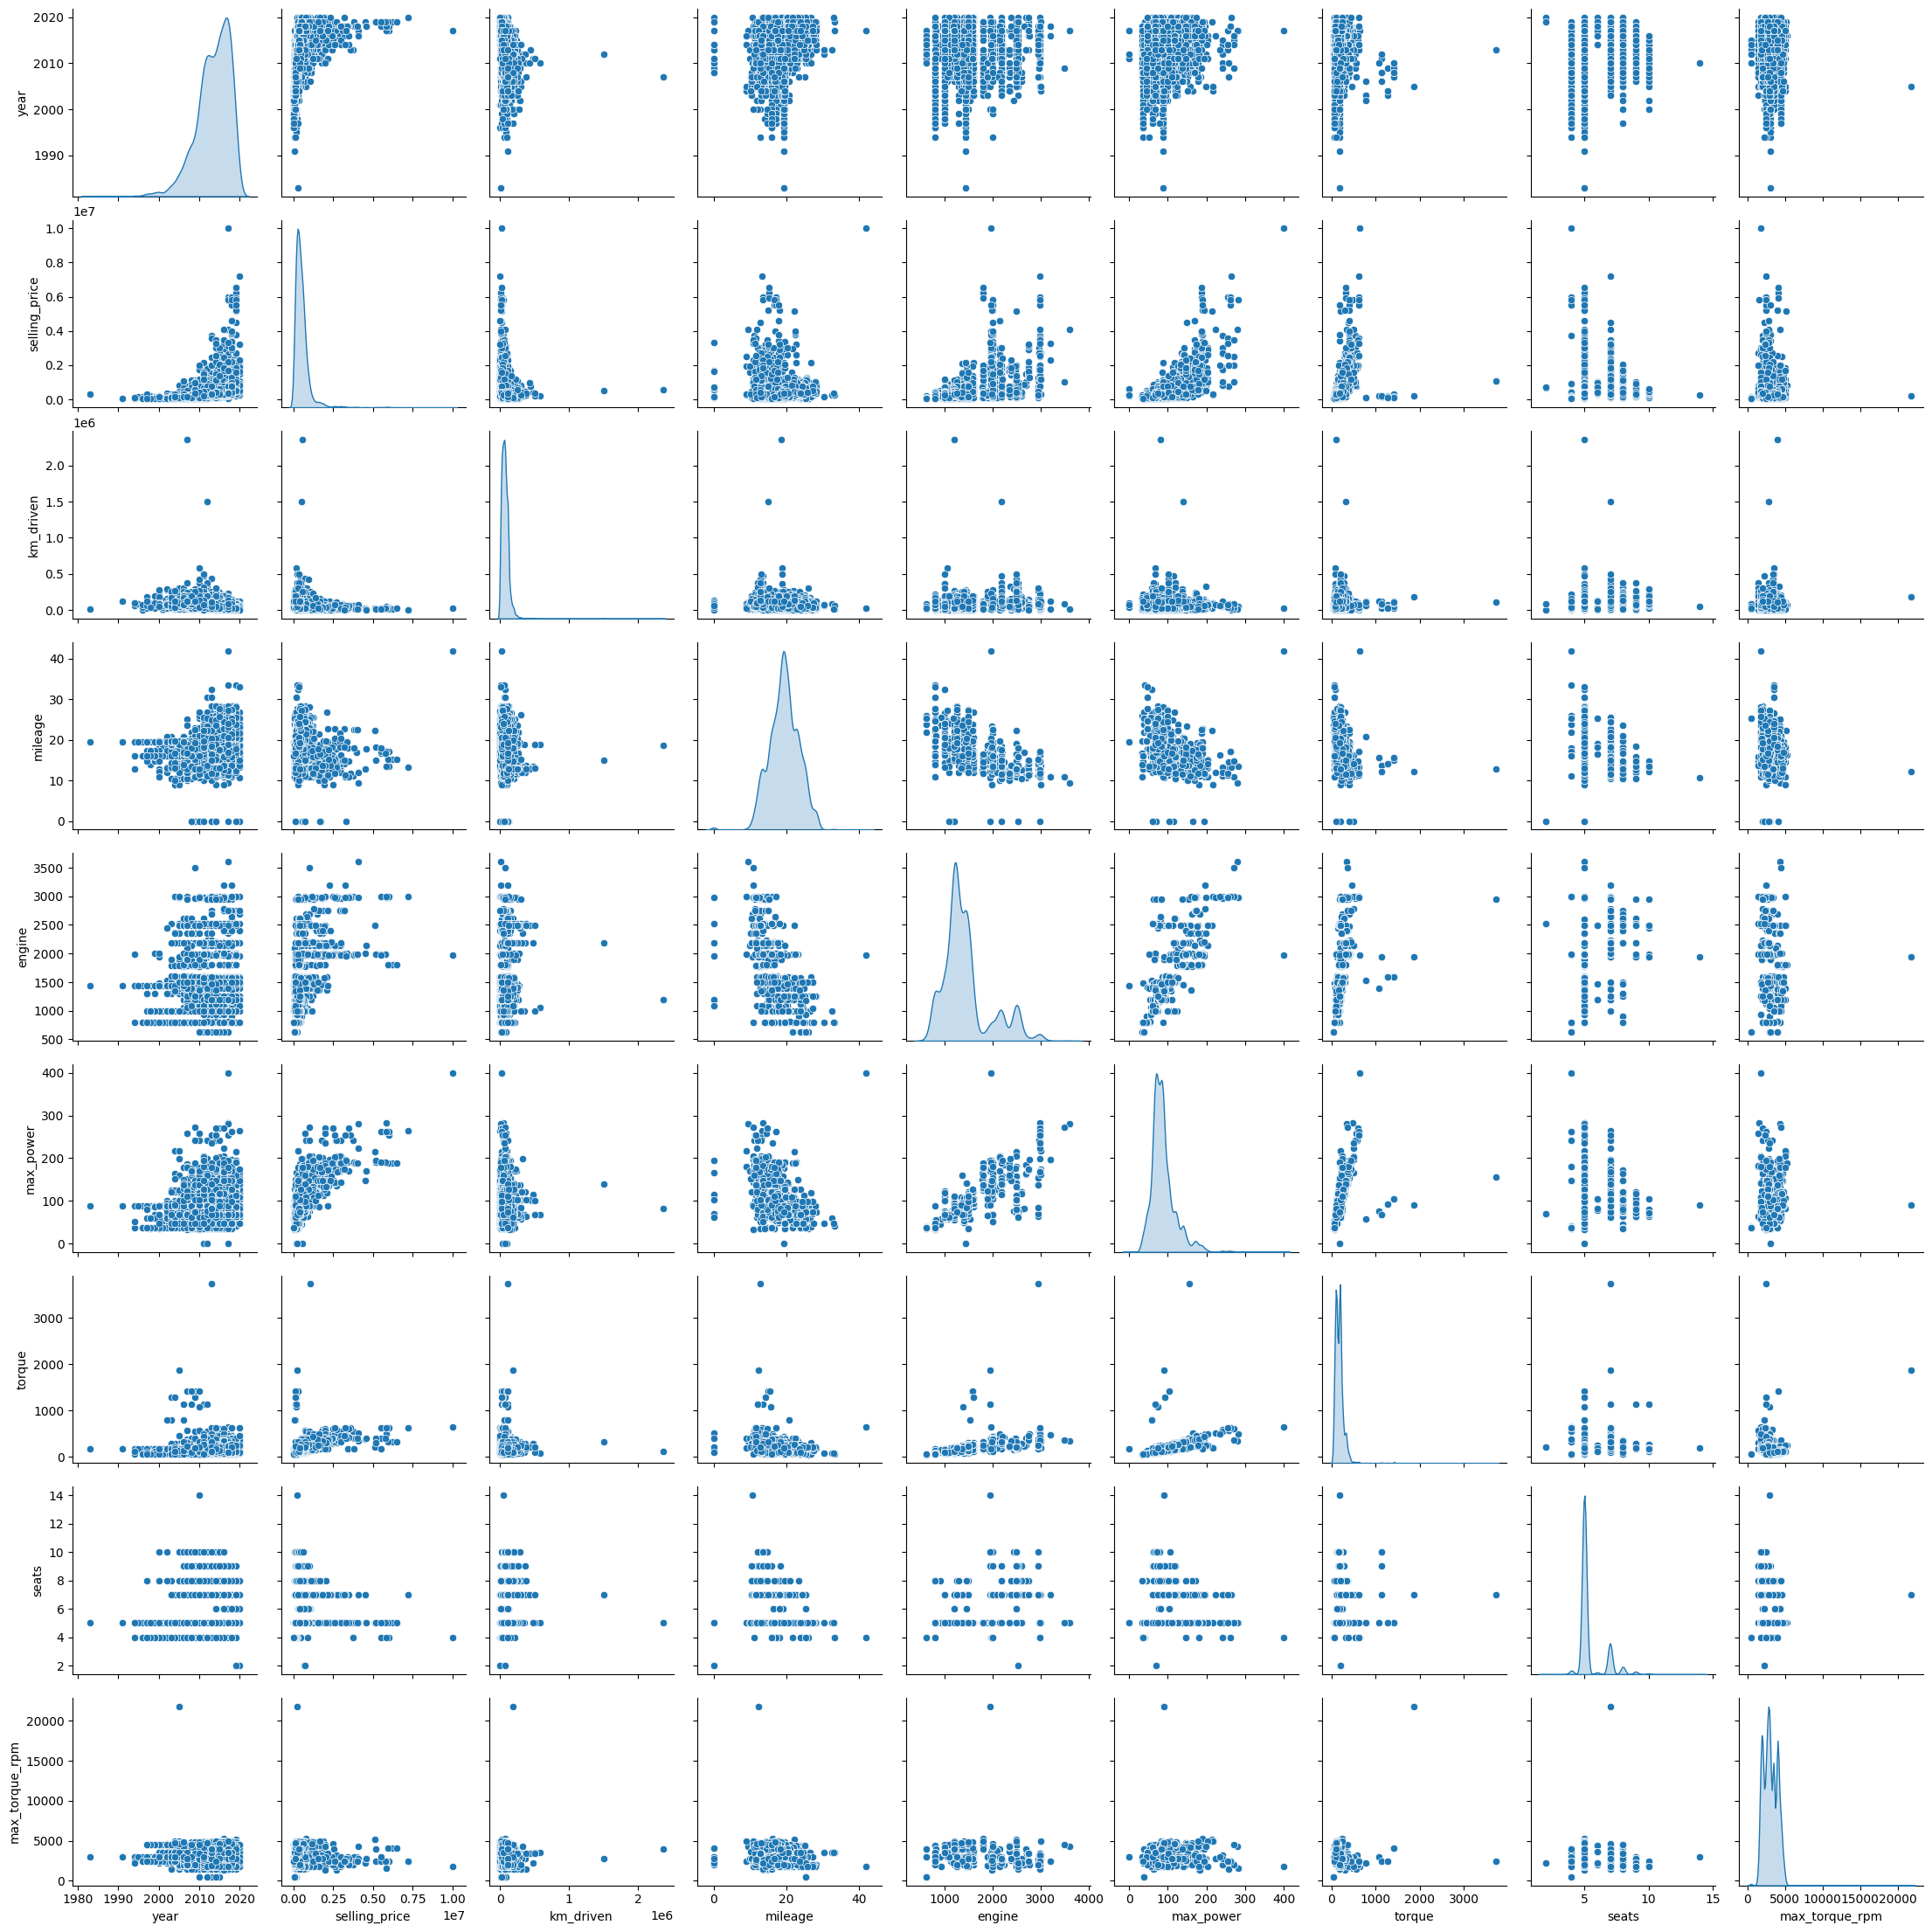

In [ ]:
sns.pairplot(df_train[df_train.columns[~cat_features_mask]], diag_kind="kde")
plt.show()

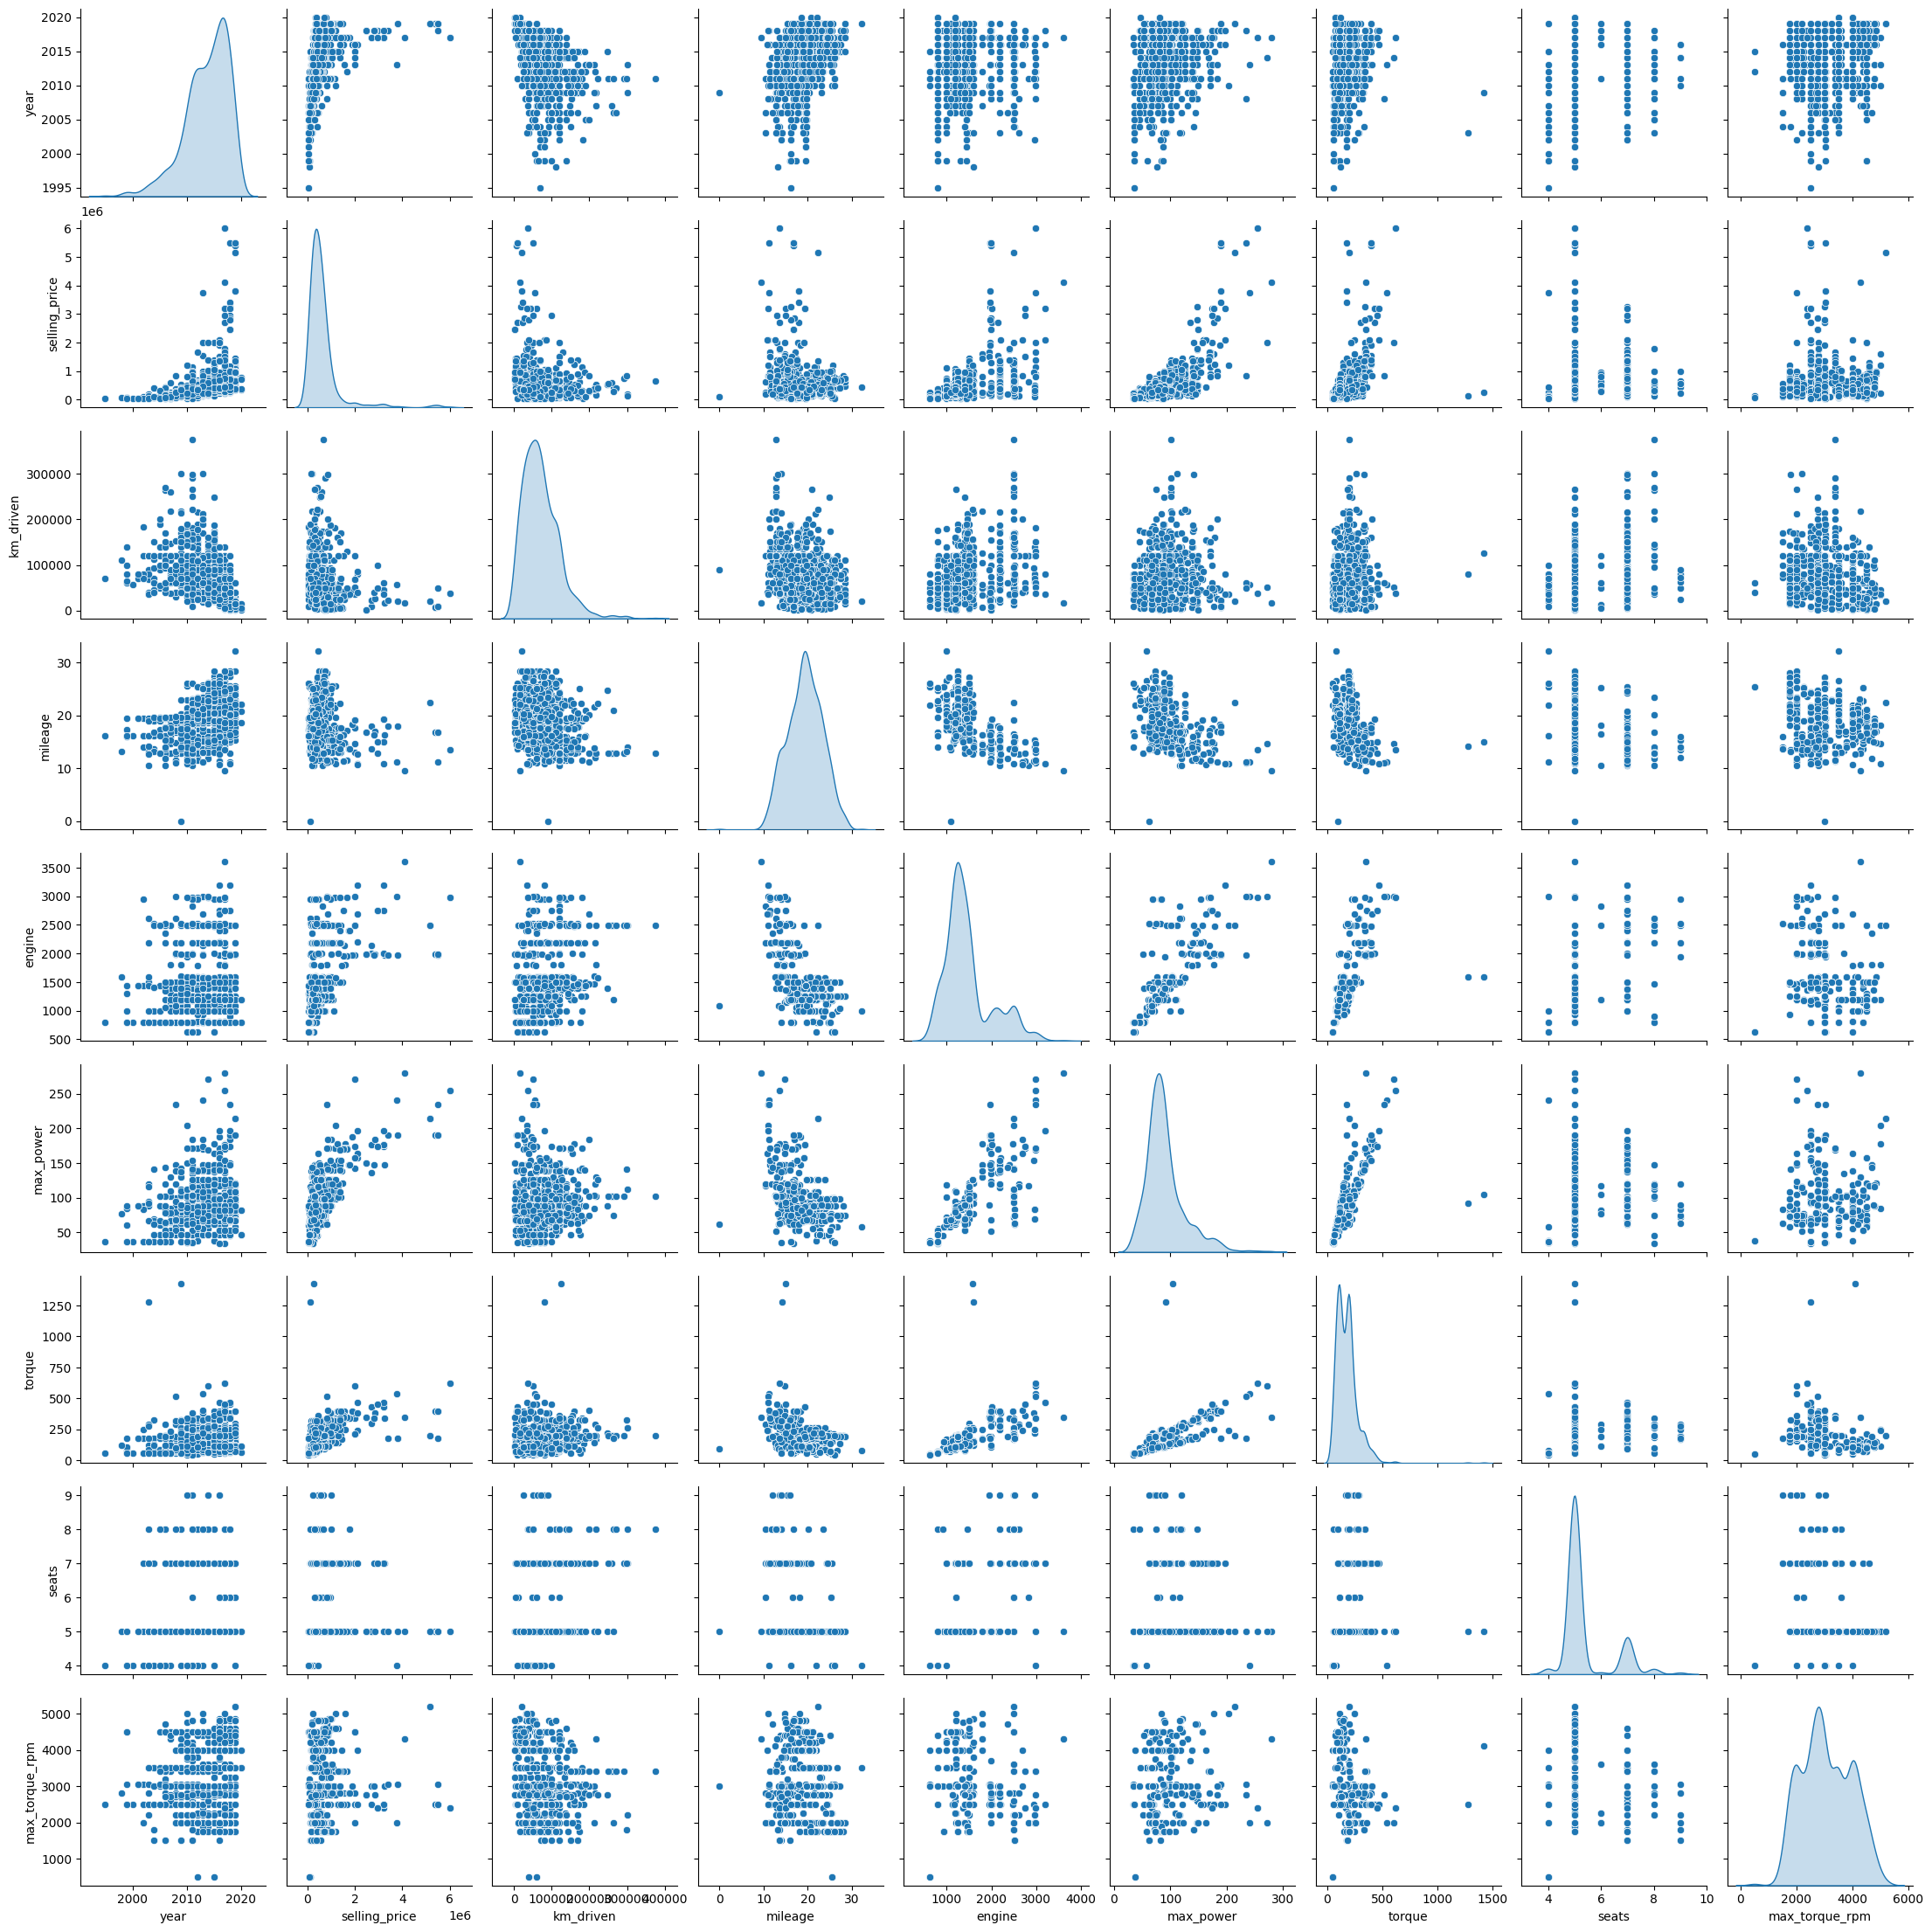

In [ ]:
sns.pairplot(df_test[df_test.columns[~cat_features_mask]], diag_kind="kde")
plt.show()

совокупности при разделении на трейн и тест оказались похожими

In [ ]:
corr_matrix = df_train[df_train.columns[~cat_features_mask]].corr()
corr_matrix

year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.427279  -0.368966  0.340579 -0.015696   
selling_price   0.427279       1.000000  -0.164828 -0.105048  0.441884   
km_driven      -0.368966      -0.164828   1.000000 -0.181941  0.233853   
mileage         0.340579      -0.105048  -0.181941  1.000000 -0.574404   
engine         -0.015696       0.441884   0.233853 -0.574404  1.000000   
max_power       0.147368       0.689743   0.026445 -0.373803  0.680178   
torque          0.040834       0.423914   0.108552 -0.224690  0.564580   
seats           0.041178       0.149953   0.192328 -0.451279  0.648335   
max_torque_rpm  0.044006      -0.084526  -0.197214 -0.190503 -0.233397   

                max_power    torque     seats  max_torque_rpm  
year             0.147368  0.040834  0.041178        0.044006  
selling_price    0.689743  0.423914  0.149953       -0.084526  
km_driven        0.026445  0.108552  0.192328       -0.197214  
mileage         -0.373803 -0.224690 -0.451279       -0.190503  
engine           0.680178  0.564580  0.648335       -0.233397  
max_power        1.000000  0.613195  0.241658       -0.011391  
torque           0.613195  1.000000  0.297400       -0.240858  
seats            0.241658  0.297400  1.000000       -0.198579  
max_torque_rpm  -0.011391 -0.240858 -0.198579        1.000000

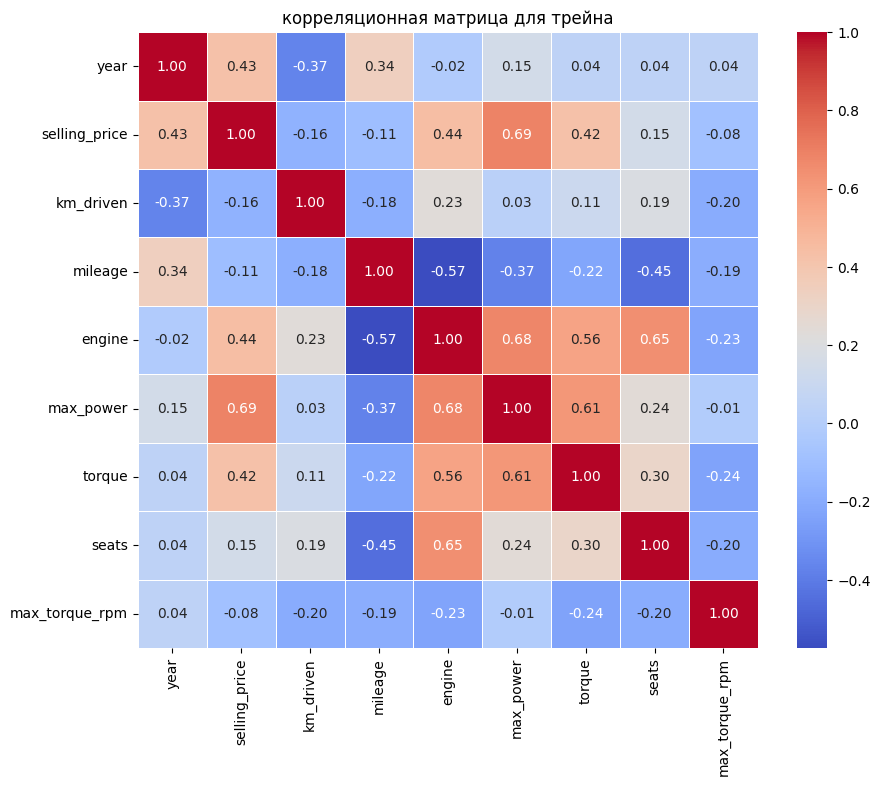

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('корреляционная матрица для трейна')
plt.show()

In [ ]:
df_train.columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm', 'name', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')



*   max_torque_rpm и max_power
*   torque и engine, torque и max_power, engine и max_power, selling_price и max_power
*   да (между ними отрицательная лин связь)




In [ ]:
df_train.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'max_torque_rpm'],
      dtype='object')

In [ ]:
selling_price_np = np.array(df_train['selling_price'])

In [ ]:
km_driven_np = np.array(df_train['km_driven'])

In [ ]:
def spearman_my(x: np.array, y: np.array) -> int:

  assert len(x) == len(y)
  n = len(x)

  x_ranks = (x.argsort()).argsort()
  y_ranks = (y.argsort()).argsort()

  return 1 - 6 * np.sum((x_ranks - y_ranks)**2) / (n * (n**2 - 1))

In [ ]:
spearman_my(selling_price_np, km_driven_np)

-0.2956986541904023

In [ ]:
from scipy.stats import spearmanr

In [ ]:
corr, pvalue = spearmanr(selling_price_np, km_driven_np)
corr

-0.29566482195509297

почти одно и то же))

In [ ]:
pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 8.0 MB/s eta 0:00:00


In [ ]:
import phik

In [ ]:
df_train.phik_matrix()

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/usr/local/lib/python3.10/dist-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


year  selling_price  km_driven   mileage    engine  \
year            1.000000       0.219841   0.081574  0.279253  0.213156   
selling_price   0.219841       1.000000   0.000000  0.649768  0.503682   
km_driven       0.081574       0.000000   1.000000  0.081625  0.210747   
mileage         0.279253       0.649768   0.081625  1.000000  0.588155   
engine          0.213156       0.503682   0.210747  0.588155  1.000000   
max_power       0.381639       0.872166   0.000000  0.687235  0.720780   
torque          0.096307       0.423431   0.000000  0.204598  0.466097   
seats           0.288178       0.196447   0.096223  0.679979  0.603400   
max_torque_rpm  0.111412       0.068255   0.000000  0.392896  0.465662   
name            0.948995       0.994871   0.000000  0.999690  1.000000   
fuel            0.205834       0.157885   0.046285  0.582304  0.644421   
seller_type     0.232412       0.334505   0.000000  0.064736  0.160346   
transmission    0.153714       0.463058   0.012824  0.331889  0.520161   
owner           0.418636       0.557641   0.087887  0.152406  0.186011   

                max_power    torque     seats  max_torque_rpm      name  \
year             0.381639  0.096307  0.288178        0.111412  0.948995   
selling_price    0.872166  0.423431  0.196447        0.068255  0.994871   
km_driven        0.000000  0.000000  0.096223        0.000000  0.000000   
mileage          0.687235  0.204598  0.679979        0.392896  0.999690   
engine           0.720780  0.466097  0.603400        0.465662  1.000000   
max_power        1.000000  0.577329  0.569587        0.267038  0.997906   
torque           0.577329  1.000000  0.206073        0.743737  1.000000   
seats            0.569587  0.206073  1.000000        0.266707  0.999985   
max_torque_rpm   0.267038  0.743737  0.266707        1.000000  0.999959   
name             0.997906  1.000000  0.999985        0.999959  1.000000   
fuel             0.236006  0.085412  0.450714        0.689673  1.000000   
seller_type      0.331904  0.074575  0.032173        0.040430  0.799127   
transmission     0.511877  0.404678  0.045734        0.113970  1.000000   
owner            0.121438  0.039605  0.046741        0.028969  0.830098   

                    fuel  seller_type  transmission     owner  
year            0.205834     0.232412      0.153714  0.418636  
selling_price   0.157885     0.334505      0.463058  0.557641  
km_driven       0.046285     0.000000      0.012824  0.087887  
mileage         0.582304     0.064736      0.331889  0.152406  
engine          0.644421     0.160346      0.520161  0.186011  
max_power       0.236006     0.331904      0.511877  0.121438  
torque          0.085412     0.074575      0.404678  0.039605  
seats           0.450714     0.032173      0.045734  0.046741  
max_torque_rpm  0.689673     0.040430      0.113970  0.028969  
name            1.000000     0.799127      1.000000  0.830098  
fuel            1.000000     0.050771      0.053721  0.030943  
seller_type     0.050771     1.000000      0.127968  0.176612  
transmission    0.053721     0.127968      1.000000  0.096990  
owner           0.030943     0.176612      0.096990  1.000000

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set(rc={'figure.figsize': (12, 6)})
sns.set_theme(style="whitegrid")

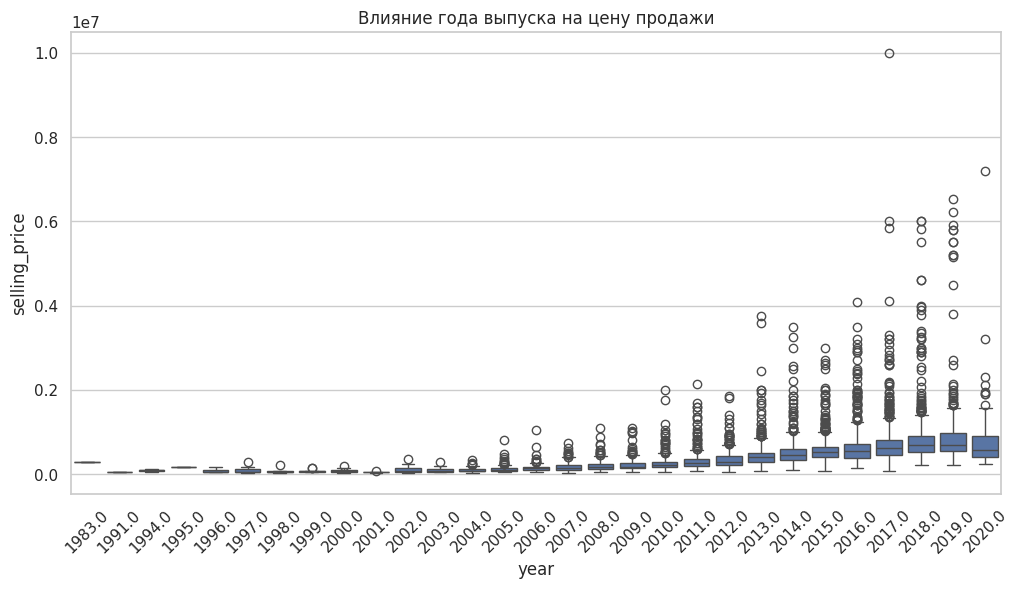

In [ ]:
sns.boxplot(x='year', y='selling_price', data=df_train)
plt.title("Влияние года выпуска на цену продажи")
plt.xticks(rotation=45)
plt.show()

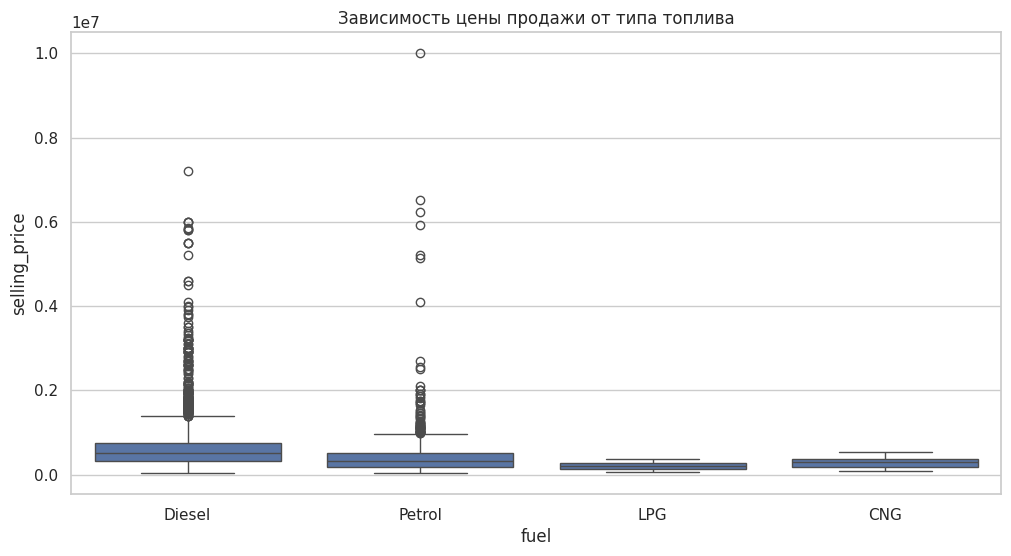

In [ ]:
sns.boxplot(x='fuel', y='selling_price', data=df_train)
plt.title("Зависимость цены продажи от типа топлива")
plt.show()


*   сильнее всего варьеруется цена на автомобили с дизельным топливом
*   самый дорогой автомобиль в датасете на бензине
*   LPG и CNG - низкий диапазон цен (бюджетный сегмент)







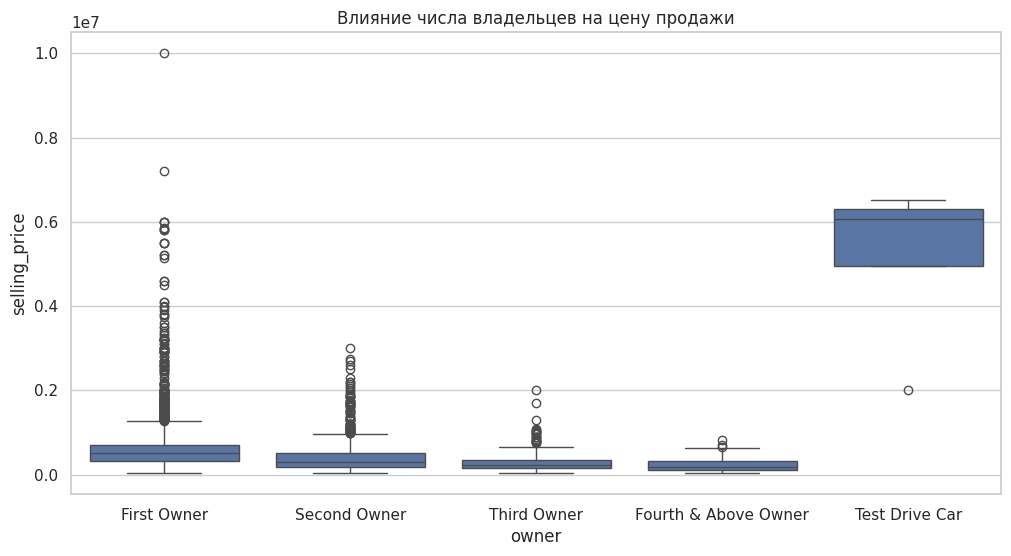

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='owner', y='selling_price', data=df_train)
plt.title("Влияние числа владельцев на цену продажи")
plt.show()



*   Test Drive Car - самая высокая средняя цена, практически нет выбросов, возможно, это новые авто/авто с минимальным пробегом
*   Чем больше было владельцев у машины - тем выше средняя цена



In [ ]:
df_train[df_train.columns[~cat_features_mask]].columns

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque', 'seats', 'max_torque_rpm'],
      dtype='object')

In [ ]:
df_train_num_cols = df_train[df_train.columns[~cat_features_mask]]

In [ ]:
df_train_num_cols.shape

(5840, 9)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_train_num_cols.drop('selling_price', axis=1)
y = df_train_num_cols['selling_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #разобьем в пропорции 80 на 20

In [ ]:
X_train.shape

(4672, 8)

In [ ]:
# assert X_train.shape == (5840, 6) ну тут неверный ассерт...........

In [ ]:
X_test.shape

(1168, 8)

In [ ]:
# assert X_test.shape == (1000, 6) и тут тоже....

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_init = model.predict(X_test)
mse = MSE(y_test, y_pred_init)
r2 = r2_score(y_test, y_pred_init)

print(f'MSE: {mse}')
print(f'𝑅2: {r2}')

MSE: 159060640431.2211
𝑅2: 0.5601395755868817


In [ ]:
def r2(y_true, y_pred):

    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)

    r2 = 1 - (ss_res / ss_tot)

    return r2

In [ ]:
def adjusted_r2(y_true, y_pred, p):

    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    n = len(y_true)

    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    return adj_r2

**adjusted−𝑅2** полезно применять при фича инжиниринге, тк в отличае от обычного **𝑅2**, который всегда растет при добавлении новых фичей, **adjusted−𝑅2** штрафует модель за добавление фичей, которые не улучшают предикты

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred_std_sc = model.predict(X_test_scaled)

In [ ]:
mse = MSE(y_test, y_pred_std_sc)
r2 = r2_score(y_test, y_pred_std_sc)

print(f'MSE w scaler: {mse}')
print(f'𝑅2 w scaler: {r2}')

MSE w scaler: 159060640431.22028
𝑅2 w scaler: 0.5601395755868839


In [ ]:
coeffs = model.coef_

In [ ]:
coeffs

array([167156.35963342, -68133.61118876, -23957.02094245,  44428.22624442,
       301892.63313589,  -3162.28667966, -36227.75750761, -67395.55922438])

In [ ]:
f_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coeff': coeffs,
    'abs_coeff': np.abs(coeffs)
})
f_importance.sort_values(by='abs_coeff', ascending=False)

feature          coeff      abs_coeff
4       max_power  301892.633136  301892.633136
0            year  167156.359633  167156.359633
1       km_driven  -68133.611189   68133.611189
7  max_torque_rpm  -67395.559224   67395.559224
3          engine   44428.226244   44428.226244
6           seats  -36227.757508   36227.757508
2         mileage  -23957.020942   23957.020942
5          torque   -3162.286680    3162.286680

max_power наиболее информативный

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso()

In [ ]:
y_pred_lasso = lasso.predict(X_test_scaled)

In [ ]:
mse = MSE(y_test, y_pred_lasso)
r2 = r2_score(y_test, y_pred_lasso)

print(f'MSE w scaler: {mse}')
print(f'𝑅2 w scaler: {r2}') #стало чуть лучше

MSE w scaler: 159059866522.23102
𝑅2 w scaler: 0.5601417157262393


In [ ]:
coeffs_lasso = model.coef_
coeffs_lasso

array([167156.35963342, -68133.61118876, -23957.02094245,  44428.22624442,
       301892.63313589,  -3162.28667966, -36227.75750761, -67395.55922438])

никакие пар-ры не занулились, это может быть связано с тем, что alpha по дефолту оч маленькое (слабая регуляризация), мало данных

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
np.logspace(-6, 6, 13)

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [ ]:
param_grid = {
    'alpha': np.logspace(-6, 6, 13)
}

In [ ]:
lasso = Lasso()
grid_search_lasso = GridSearchCV(estimator=lasso, scoring='neg_mean_squared_error', param_grid=param_grid, cv=10)

In [ ]:
grid_search_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = grid_search_lasso.best_params_['alpha']
best_model_lasso = grid_search_lasso.best_estimator_

In [ ]:
y_pred_lasso_gs = best_model_lasso.predict(X_test_scaled)

In [ ]:
mse = MSE(y_test, y_pred_lasso_gs)
r2 = r2_score(y_test, y_pred_lasso_gs)

print(f'MSE w scaler and grid search: {mse}')
print(f'𝑅2 w scaler and grid search: {r2}') #стало еще лучше!

MSE w scaler and grid search: 158319300200.46826
𝑅2 w scaler and grid search: 0.5621896504995025


In [ ]:
coeffs = best_model_lasso.coef_
zero_coefficients = np.where(coeffs == 0)[0]
zero_coefficients

array([5])

In [ ]:
f_importance = pd.DataFrame({
    'feature': X_train.columns,
    'coeff': coeffs,
    'abs_coeff': np.abs(coeffs)
})
f_importance.sort_values(by='abs_coeff', ascending=False)

feature          coeff      abs_coeff
4       max_power  301425.754889  301425.754889
0            year  165155.972698  165155.972698
1       km_driven  -66945.115312   66945.115312
7  max_torque_rpm  -64240.743215   64240.743215
3          engine   41862.670752   41862.670752
6           seats  -32404.664916   32404.664916
2         mileage  -20596.635694   20596.635694
5          torque      -0.000000       0.000000

занулились веса для признака torque

In [ ]:
grid_search_lasso.n_splits_ * len(param_grid['alpha']) #всего обучено 130 моделей

130

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
param_grid = {
    'alpha': np.logspace(-6, 6, 13),  # alpha от 10^-6 до 10^6
    'l1_ratio': np.linspace(0, 1, 11)  # l1_ratio от 0 до 1 с шагом 0.1
}

In [ ]:
elastic_net = ElasticNet()
grid_search_elastic_net = GridSearchCV(estimator=elastic_net, scoring='neg_mean_squared_error', param_grid=param_grid, cv=10)

In [ ]:
grid_search_elastic_net.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [ ]:
best_alpha = grid_search_elastic_net.best_params_['alpha']
best_model_elastic_net = grid_search_elastic_net.best_estimator_

In [ ]:
y_pred_elastic_net_gc = best_model_elastic_net.predict(X_test_scaled)

In [ ]:
mse = MSE(y_test, y_pred_elastic_net_gc)
r2 = r2_score(y_test, y_pred_elastic_net_gc)

print(f'MSE w scaler and grid search: {mse}')
print(f'𝑅2 w scaler and grid search: {r2}')

MSE w scaler and grid search: 158319300200.46826
𝑅2 w scaler and grid search: 0.5621896504995025


In [ ]:
grid_search_elastic_net.n_splits_ * len(param_grid['alpha']) * len(param_grid['l1_ratio']) #обучили 1430 моделей

1430

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def l0_regularization(X, y, max_features=None):
    """
    Реализация L0-регуляризации через жадное удаление признаков.

    Parameters:
    - X: матрица признаков
    - y: целевая переменная
    - max_features: максимальное количество признаков, которые можно оставить

    Returns:
    - оставшиеся признаки
    - обученная модель
    """
    remaining_features = list(range(X.shape[1]))
    model = LinearRegression()
    history = []

    while len(remaining_features) > (max_features or 0):

        model.fit(X[:, remaining_features], y)
        predictions = model.predict(X[:, remaining_features])
        mse = mean_squared_error(y, predictions)

        history.append((len(remaining_features), mse))

        coef = model.coef_
        least_important_feature = np.argmin(np.abs(coef))

        del remaining_features[least_important_feature]

    model.fit(X[:, remaining_features], y)
    return remaining_features, model, history

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class L0GreedyFeatureSelection:
    def __init__(self, tolerance=100000000000, verbose=False):
        """
        Инициализация L0-регуляризации методом жадного выкидывания признаков

        :param tolerance: Максимально допустимое ухудшение метрики, при котором остановится удаление признаков
        :param verbose: Флаг для вывода информации о процессе
        """
        self.tolerance = tolerance
        self.verbose = verbose
        self.selected_features_ = None
        self.model_ = None

    def fit(self, X, y):
        """
        Подбирает признаки и обучает модель с использованием жадного метода удаления

        :param X: Матрица признаков
        :param y: Вектор целевой переменной
        """

        selected_features = list(range(X.shape[1]))
        best_score = float('inf')
        current_score = float('inf')
        self.model_ = LinearRegression()

        while len(selected_features) > 0:
            scores = []

            for feature in selected_features:
                temp_features = [f for f in selected_features if f != feature]

                self.model_.fit(X[:, temp_features], y)

                y_pred = self.model_.predict(X[:, temp_features])
                score = mean_squared_error(y, y_pred)
                scores.append((score, feature))

            scores.sort(key=lambda x: x[0])
            best_feature_to_remove = scores[0][1]
            current_score = scores[0][0]

            if best_score - current_score <= self.tolerance:
                if self.verbose:
                    print(f"Stopping criteria reached. Current score: {current_score:.4f}")
                break

            best_score = current_score
            selected_features.remove(best_feature_to_remove)

            if self.verbose:
                print(f"Removed feature {best_feature_to_remove}, new score: {best_score:.4f}")

        self.selected_features_ = selected_features
        self.model_.fit(X[:, self.selected_features_], y)

    def predict(self, X):
        """
        Делает предсказание на основе выбранных признаков

        :param X: Матрица признаков
        :return: Вектор предсказаний
        """
        if self.selected_features_ is None:
            raise ValueError("Model has not been fitted yet.")
        return self.model_.predict(X[:, self.selected_features_])

    def get_selected_features(self):
        """
        Возвращает список индексов выбранных признаков.
        """
        if self.selected_features_ is None:
            raise ValueError("Model has not been fitted yet.")
        return self.selected_features_

In [ ]:
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

In [ ]:
l0_model = L0GreedyFeatureSelection(tolerance=-300000000, verbose=True)
l0_model.fit(X_train_np, y_train_np)

Removed feature 5, new score: 105055287432.1149
Removed feature 2, new score: 105284532504.0247
Stopping criteria reached. Current score: 105765804921.0057


In [ ]:
selected_features = l0_model.get_selected_features()
print(f"Selected features: {selected_features}")

Selected features: [0, 1, 3, 4, 6, 7]


In [ ]:
y_pred = l0_model.predict(X_test_np)
mse = mean_squared_error(y_test_np, y_pred)
print(f"Test MSE: {mse:.4f}")

Test MSE: 157875324358.7415


In [ ]:
df_train_copy = df_train.copy(deep=True)

In [ ]:
df_test_copy = df_test.copy(deep=True)

In [ ]:
df_train_cat_cols = df_train_copy

In [ ]:
df_test_cat_cols = df_test_copy

In [ ]:
df_train_cat_cols[['name']]

name
0                Maruti Swift Dzire VDI
1          Skoda Rapid 1.5 TDI Ambition
2             Hyundai i20 Sportz Diesel
3                Maruti Swift VXI BSIII
4         Hyundai Xcent 1.2 VTVT E Plus
...                                 ...
5835            Hyundai Santro Xing GLS
5836  Maruti Wagon R VXI BS IV with ABS
5837                  Hyundai i20 Magna
5838              Hyundai Verna CRDi SX
5839             Maruti Swift Dzire ZDi

[5840 rows x 1 columns]

In [ ]:
df_train_cat_cols[['name']].nunique()

name    30
dtype: int64

для простоты оставим только бренд авто

In [ ]:
df_train_cat_cols['name'].apply(lambda x: x.split()[0]).nunique()

30

In [ ]:
df_train_cat_cols['name'] = df_train_cat_cols['name'].apply(lambda x: x.split()[0])
df_train_cat_cols[['name']]

name
0      Maruti
1       Skoda
2     Hyundai
3      Maruti
4     Hyundai
...       ...
5835  Hyundai
5836   Maruti
5837  Hyundai
5838  Hyundai
5839   Maruti

[5840 rows x 1 columns]

In [ ]:
df_test_cat_cols['name'] = df_test_cat_cols['name'].apply(lambda x: x.split()[0])
df_test_cat_cols[['name']]

name
0    Mahindra
1        Tata
2       Honda
3       Honda
4        Tata
..        ...
995   Hyundai
996   Hyundai
997   Hyundai
998   Hyundai
999     Honda

[1000 rows x 1 columns]

In [ ]:
df_train_cat_cols['name'].unique()

array(['Maruti', 'Skoda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Honda', 'Chevrolet', 'Fiat', 'Datsun', 'Tata', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Isuzu', 'Peugeot'], dtype=object)

In [ ]:
df_test_cat_cols['name'].unique()

array(['Mahindra', 'Tata', 'Honda', 'Chevrolet', 'Maruti', 'Hyundai',
       'Lexus', 'Ford', 'Jeep', 'Renault', 'Toyota', 'Skoda', 'BMW',
       'Datsun', 'Volvo', 'Nissan', 'Volkswagen', 'Ambassador', 'Jaguar',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Opel', 'Fiat', 'Ashok'],
      dtype=object)

In [ ]:
df_train_cat_cols.shape

(5840, 14)

In [ ]:
assert df_train_cat_cols.shape == (5840, 14)

In [ ]:
assert df_test_cat_cols.shape == (1000, 14)

In [ ]:
df_train_cat_cols.describe(include='object')

name    fuel seller_type transmission        owner
count     5840    5840        5840         5840         5840
unique      30       4           3            2            5
top     Maruti  Diesel  Individual       Manual  First Owner
freq      1804    3177        5223         5336         3603

закодируем сразу все, зачем мелочиться..

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df_train_cat_cols.drop('selling_price', axis=1)
y = df_train_cat_cols['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #разобьем в пропорции 80 на 20

In [ ]:
cat_features_mask = (X_train.dtypes == "object").values

In [ ]:
X_train[X_train.columns[cat_features_mask]]

name    fuel seller_type transmission         owner
5309  Hyundai  Diesel  Individual       Manual  Second Owner
1647   Maruti  Diesel  Individual       Manual   First Owner
1669   Maruti  Diesel  Individual       Manual  Second Owner
3159     Ford  Diesel  Individual       Manual   First Owner
4575  Hyundai  Petrol  Individual       Manual   First Owner
...       ...     ...         ...          ...           ...
3772   Maruti     CNG  Individual       Manual   First Owner
5191   Maruti     CNG  Individual       Manual   First Owner
5226  Hyundai  Petrol  Individual       Manual   First Owner
5390  Renault  Petrol  Individual       Manual   First Owner
860    Maruti  Petrol      Dealer       Manual   First Owner

[4672 rows x 5 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features_train = encoder.fit_transform(X_train[X_train.columns[cat_features_mask]])

In [ ]:
X_train_cat = pd.DataFrame(encoded_features_train, columns=encoder.get_feature_names_out(X_train[X_train.columns[cat_features_mask]].columns))
X_train_cat

name_Audi  name_BMW  name_Chevrolet  name_Daewoo  name_Datsun  \
0           0.0       0.0             0.0          0.0          0.0   
1           0.0       0.0             0.0          0.0          0.0   
2           0.0       0.0             0.0          0.0          0.0   
3           0.0       0.0             0.0          0.0          0.0   
4           0.0       0.0             0.0          0.0          0.0   
...         ...       ...             ...          ...          ...   
4667        0.0       0.0             0.0          0.0          0.0   
4668        0.0       0.0             0.0          0.0          0.0   
4669        0.0       0.0             0.0          0.0          0.0   
4670        0.0       0.0             0.0          0.0          0.0   
4671        0.0       0.0             0.0          0.0          0.0   

      name_Fiat  name_Force  name_Ford  name_Honda  name_Hyundai  ...  \
0           0.0         0.0        0.0         0.0           1.0  ...   
1           0.0         0.0        0.0         0.0           0.0  ...   
2           0.0         0.0        0.0         0.0           0.0  ...   
3           0.0         0.0        1.0         0.0           0.0  ...   
4           0.0         0.0        0.0         0.0           1.0  ...   
...         ...         ...        ...         ...           ...  ...   
4667        0.0         0.0        0.0         0.0           0.0  ...   
4668        0.0         0.0        0.0         0.0           0.0  ...   
4669        0.0         0.0        0.0         0.0           1.0  ...   
4670        0.0         0.0        0.0         0.0           0.0  ...   
4671        0.0         0.0        0.0         0.0           0.0  ...   

      fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0             1.0       0.0          0.0                     1.0   
1             1.0       0.0          0.0                     1.0   
2             1.0       0.0          0.0                     1.0   
3             1.0       0.0          0.0                     1.0   
4             0.0       0.0          1.0                     1.0   
...           ...       ...          ...                     ...   
4667          0.0       0.0          0.0                     1.0   
4668          0.0       0.0          0.0                     1.0   
4669          0.0       0.0          1.0                     1.0   
4670          0.0       0.0          1.0                     1.0   
4671          0.0       0.0          1.0                     0.0   

      seller_type_Trustmark Dealer  transmission_Manual  \
0                              0.0                  1.0   
1                              0.0                  1.0   
2                              0.0                  1.0   
3                              0.0                  1.0   
4                              0.0                  1.0   
...                            ...                  ...   
4667                           0.0                  1.0   
4668                           0.0                  1.0   
4669                           0.0                  1.0   
4670                           0.0                  1.0   
4671                           0.0                  1.0   

      owner_Fourth & Above Owner  owner_Second Owner  owner_Test Drive Car  \
0                            0.0                 1.0                   0.0   
1                            0.0                 0.0                   0.0   
2                            0.0                 1.0                   0.0   
3                            0.0                 0.0                   0.0   
4                            0.0                 0.0                   0.0   
...                          ...                 ...                   ...   
4667                         0.0                 0.0                   0.0   
4668                         0.0                 0.0                   0.0   
4669                         0.0                

In [ ]:
encoded_features_test = encoder.transform(X_test[X_test.columns[cat_features_mask]])
encoded_features_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_test_cat = pd.DataFrame(encoded_features_test, columns=encoder.get_feature_names_out(X_test[X_test.columns[cat_features_mask]].columns))

In [ ]:
X_train = X_train.drop(columns=X_test[X_test.columns[cat_features_mask]].columns)
X_test = X_test.drop(columns=X_test[X_test.columns[cat_features_mask]].columns)

In [ ]:
columns = X_train.columns

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=columns, index=X_test.index)

In [ ]:
X_train = pd.concat([X_train.reset_index(drop=True), X_train_cat.reset_index(drop=True)], axis=1)
X_train

year  km_driven    mileage  engine  max_power      torque  seats  \
0     2014.0    80000.0  24.000000    1120   70.00000  160.000000      5   
1     2011.0    85000.0  19.432842    1435   88.10307  176.262985      5   
2     2012.0    50000.0  22.900000    1248   74.00000  190.000000      5   
3     2015.0    80000.0  25.010000    1498   89.75000  204.000000      5   
4     2018.0     4000.0  18.900000    1197   81.86000  113.750000      5   
...      ...        ...        ...     ...        ...         ...    ...   
4667  2017.0    30000.0  21.940000    1196   63.00000   83.000000      5   
4668  2018.0    60000.0  26.600000     998   58.16000   77.000000      5   
4669  2005.0    89500.0  19.432842    1435   88.10307  176.262985      5   
4670  2019.0     6500.0  20.000000     999   72.00000   96.000000      7   
4671  2018.0    41779.0  21.210000    1197   81.80000  113.000000      5   

      max_torque_rpm  name_Audi  name_BMW  ...  fuel_Diesel  fuel_LPG  \
0        2750.000000        0.0       0.0  ...          1.0       0.0   
1        3044.073587        0.0       0.0  ...          1.0       0.0   
2        2000.000000        0.0       0.0  ...          1.0       0.0   
3        2750.000000        0.0       0.0  ...          1.0       0.0   
4        4000.000000        0.0       0.0  ...          0.0       0.0   
...              ...        ...       ...  ...          ...       ...   
4667     3000.000000        0.0       0.0  ...          0.0       0.0   
4668     3500.000000        0.0       0.0  ...          0.0       0.0   
4669     3044.073587        0.0       0.0  ...          0.0       0.0   
4670     3500.000000        0.0       0.0  ...          0.0       0.0   
4671     4200.000000        0.0       0.0  ...          0.0       0.0   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0             0.0                     1.0                           0.0   
1             0.0                     1.0                           0.0   
2             0.0                     1.0                           0.0   
3             0.0                     1.0                           0.0   
4             1.0                     1.0                           0.0   
...           ...                     ...                           ...   
4667          0.0                     1.0                           0.0   
4668          0.0                     1.0                           0.0   
4669          1.0                     1.0                           0.0   
4670          1.0                     1.0                           0.0   
4671          1.0                     0.0                           0.0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                     1.0                         0.0                 1.0   
1                     1.0                         0.0                 0.0   
2                     1.0                         0.0                 1.0   
3                     1.0                         0.0                 0.0   
4                     1.0                         0.0                 0.0   
...                   ...                         ...                 ...   
4667                  1.0                         0.0                 0.0   
4668                  1.0                         0.0                 0.0   
4669                  1.0                         0.0                 0.0   
4670                  1.0                         0.0                 0.0   
4671                  1.0                         0.0                 0.0   

      owner_Test Drive Car  owner_Third Owner  
0                      0.0                0.0  
1                      0.0                0.0  
2                      0.0                0.0  
3                      0.0                0.0  
4                      0.0                0.0  
...                    ...                ...  
4667                   0.0                0.0  
4668    

In [ ]:
X_test = pd.concat([X_test.reset_index(drop=True), X_test_cat.reset_index(drop=True)], axis=1)
X_test

year  km_driven    mileage  engine  max_power      torque  seats  \
0     2010.0    77088.0  14.000000    2489   95.00000  220.000000      8   
1     2016.0    50000.0  26.600000     998   58.16000   77.000000      5   
2     2016.0    15000.0  18.150000    1198   82.00000  115.000000      6   
3     2016.0    30000.0  21.700000    1498   98.96000  215.000000      5   
4     2010.0   100000.0  21.100000    1248   73.90000  113.000000      5   
...      ...        ...        ...     ...        ...         ...    ...   
1163  2011.0    40000.0   0.000000    1086   62.00000   96.100000      5   
1164  2005.0    30000.0  19.432842    1435   88.10307  176.262985      5   
1165  2008.0   100000.0  17.500000    1298   85.80000  114.000000      5   
1166  2012.0   130000.0  20.540000    1598  103.60000  250.000000      5   
1167  2015.0    70000.0  24.400000    1120   71.00000  180.400000      5   

      max_torque_rpm  name_Audi  name_BMW  ...  fuel_Diesel  fuel_LPG  \
0        2600.000000        0.0       0.0  ...          1.0       0.0   
1        3500.000000        0.0       0.0  ...          0.0       0.0   
2        3600.000000        0.0       0.0  ...          0.0       0.0   
3        2500.000000        0.0       0.0  ...          1.0       0.0   
4        4500.000000        0.0       0.0  ...          1.0       0.0   
...              ...        ...       ...  ...          ...       ...   
1163     3000.000000        0.0       0.0  ...          0.0       0.0   
1164     3044.073587        0.0       0.0  ...          1.0       0.0   
1165     4000.000000        0.0       0.0  ...          0.0       0.0   
1166     2500.000000        0.0       0.0  ...          1.0       0.0   
1167     2500.000000        0.0       0.0  ...          1.0       0.0   

      fuel_Petrol  seller_type_Individual  seller_type_Trustmark Dealer  \
0             0.0                     1.0                           0.0   
1             0.0                     1.0                           0.0   
2             1.0                     1.0                           0.0   
3             0.0                     1.0                           0.0   
4             0.0                     1.0                           0.0   
...           ...                     ...                           ...   
1163          1.0                     1.0                           0.0   
1164          0.0                     1.0                           0.0   
1165          1.0                     1.0                           0.0   
1166          0.0                     1.0                           0.0   
1167          0.0                     1.0                           0.0   

      transmission_Manual  owner_Fourth & Above Owner  owner_Second Owner  \
0                     1.0                         0.0                 0.0   
1                     1.0                         0.0                 0.0   
2                     1.0                         0.0                 1.0   
3                     1.0                         0.0                 0.0   
4                     1.0                         0.0                 0.0   
...                   ...                         ...                 ...   
1163                  1.0                         1.0                 0.0   
1164                  1.0                         0.0                 1.0   
1165                  1.0                         0.0                 0.0   
1166                  1.0                         0.0                 1.0   
1167                  1.0                         0.0                 0.0   

      owner_Test Drive Car  owner_Third Owner  
0                      0.0                0.0  
1                      0.0                0.0  
2                      0.0                0.0  
3                      0.0                0.0  
4                      0.0                0.0  
...                    ...                ...  
1163                   0.0                0.0  
1164    

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': np.logspace(-6, 6, 13)  # alpha от 10^-6 до 10^6
}

ridge = Ridge()

grid_search_ridge = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='r2',
    cv=10,
)

grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])},
             scoring='r2')

In [ ]:
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
best_score = grid_search_ridge.best_score_
best_model_ridge = grid_search_ridge.best_estimator_

In [ ]:
y_pred = best_model_ridge.predict(X_test)

In [ ]:
mse = MSE(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE w scaler and grid search: {mse}')
print(f'𝑅2 w scaler and grid search: {r2}')

MSE w scaler and grid search: 123067366872.84023
𝑅2 w scaler and grid search: 0.6596740458397709


удалось значительно улучшить предсказания модели!

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd

In [ ]:
X = df_train_cat_cols.drop('selling_price', axis=1)
y = df_train_cat_cols['selling_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #разобьем в пропорции 80 на 20

In [ ]:
X_train

year  km_driven    mileage  engine  max_power      torque  seats  \
5309  2014.0    80000.0  24.000000    1120   70.00000  160.000000      5   
1647  2011.0    85000.0  19.432842    1435   88.10307  176.262985      5   
1669  2012.0    50000.0  22.900000    1248   74.00000  190.000000      5   
3159  2015.0    80000.0  25.010000    1498   89.75000  204.000000      5   
4575  2018.0     4000.0  18.900000    1197   81.86000  113.750000      5   
...      ...        ...        ...     ...        ...         ...    ...   
3772  2017.0    30000.0  21.940000    1196   63.00000   83.000000      5   
5191  2018.0    60000.0  26.600000     998   58.16000   77.000000      5   
5226  2005.0    89500.0  19.432842    1435   88.10307  176.262985      5   
5390  2019.0     6500.0  20.000000     999   72.00000   96.000000      7   
860   2018.0    41779.0  21.210000    1197   81.80000  113.000000      5   

      max_torque_rpm     name    fuel seller_type transmission         owner  
5309     2750.000000  Hyundai  Diesel  Individual       Manual  Second Owner  
1647     3044.073587   Maruti  Diesel  Individual       Manual   First Owner  
1669     2000.000000   Maruti  Diesel  Individual       Manual  Second Owner  
3159     2750.000000     Ford  Diesel  Individual       Manual   First Owner  
4575     4000.000000  Hyundai  Petrol  Individual       Manual   First Owner  
...              ...      ...     ...         ...          ...           ...  
3772     3000.000000   Maruti     CNG  Individual       Manual   First Owner  
5191     3500.000000   Maruti     CNG  Individual       Manual   First Owner  
5226     3044.073587  Hyundai  Petrol  Individual       Manual   First Owner  
5390     3500.000000  Renault  Petrol  Individual       Manual   First Owner  
860      4200.000000   Maruti  Petrol      Dealer       Manual   First Owner  

[4672 rows x 13 columns]

In [ ]:
cat_features_mask = (X.dtypes == "object").values
cat_features_mask

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True])

сразу сделаем начальный пайплайн чтоб легко быстро обучать и сравнивать результаты

In [ ]:
# Преобразование числовых столбцов
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Замена пропусков на среднее
    ('scaler', StandardScaler())  # Масштабирование признаков
])

# Преобразование категориальных столбцов
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Замена пропусков на 'NA'
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))  # OHE-кодирование
])

# Объединяем преобразования с помощью ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.columns[~cat_features_mask]),
        ('cat', categorical_transformer, X.columns[cat_features_mask])
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1))
])

pipeline.fit(X_train, y_train)

y_pred_pipeline_init = pipeline.predict(X_test)

mse = MSE(y_test, y_pred_pipeline_init)
r2 = r2_score(y_test, y_pred_pipeline_init)

print(f"mse score on test set: {mse:.0f}")
print(f"r2 score on test set: {r2:.5f}")

mse score on test set: 123068019272
r2 score on test set: 0.65967


посмотрим на гистограммы распрееделения вещественных признаков и увидим, что 'km_driven', 'torque', 'max_power' имеют близкие к логнормальным распределения

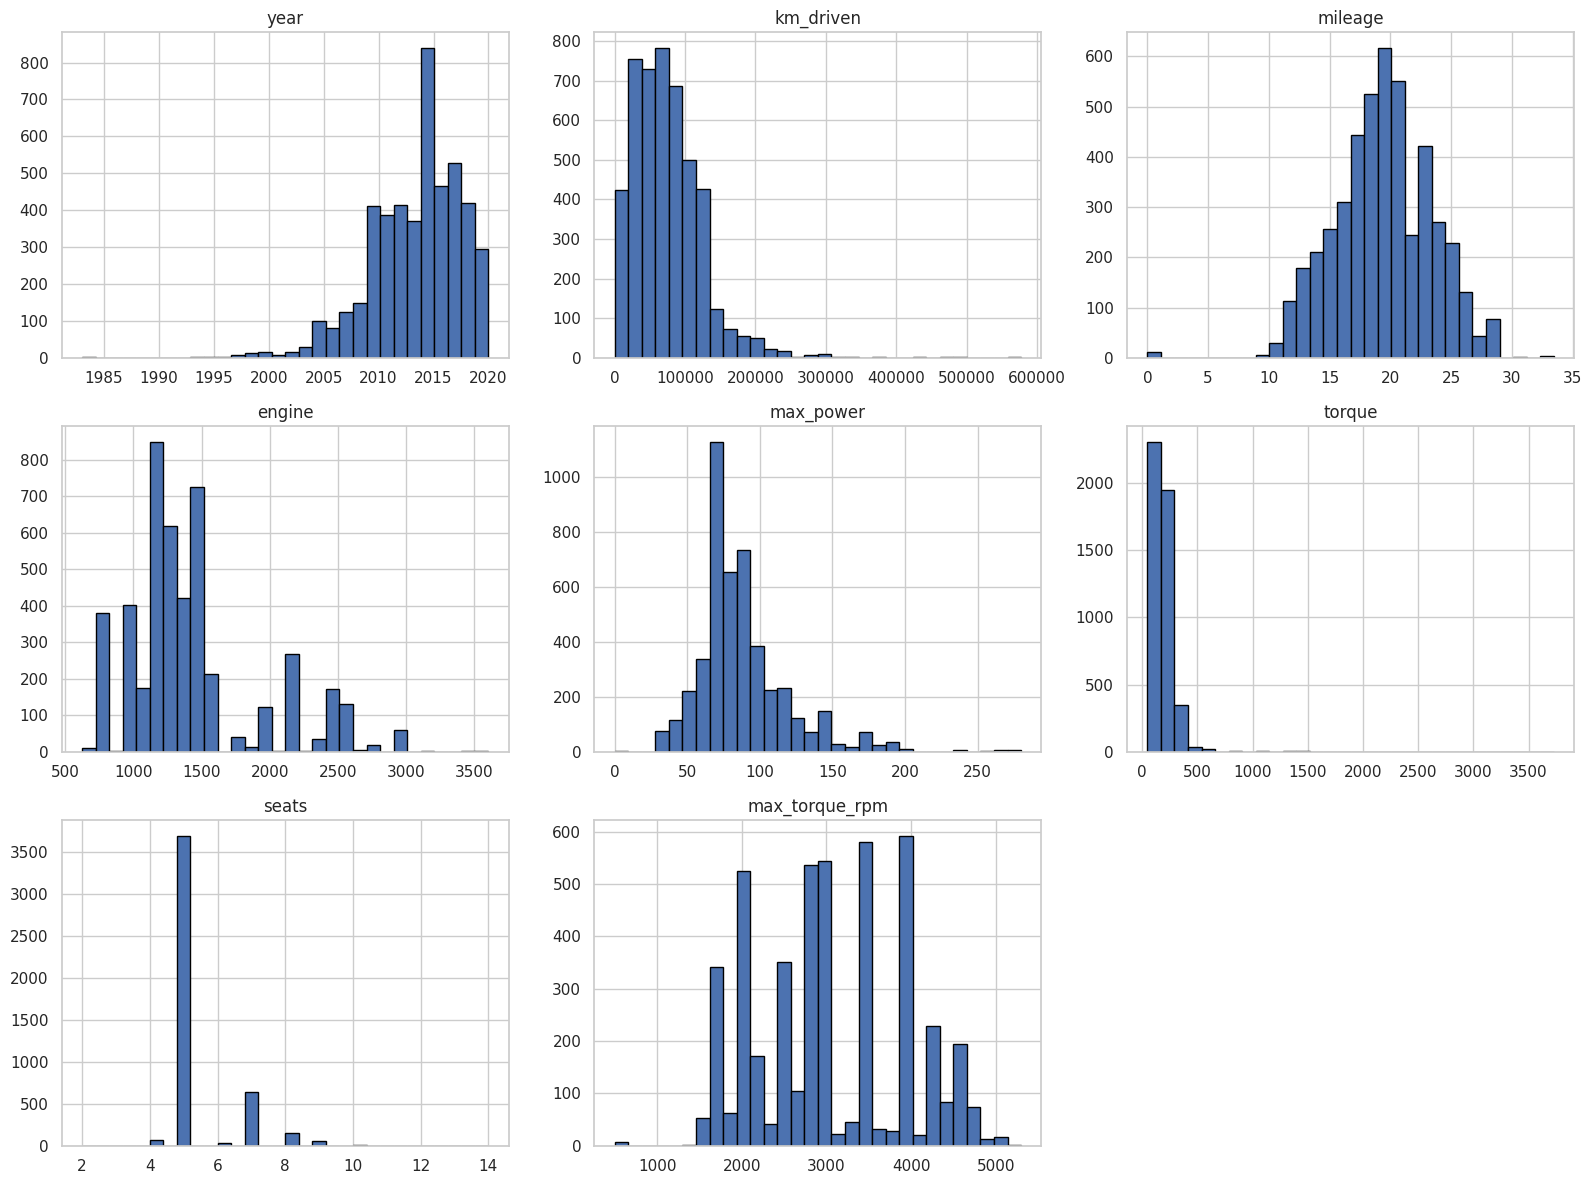

In [ ]:
import matplotlib.pyplot as plt

numeric_features = X.columns[~cat_features_mask].tolist()

X_train[numeric_features].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

In [ ]:
numeric_features = X.columns[~cat_features_mask].tolist()

In [ ]:
def generate_new_features(X):

    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=numeric_features)

    X_new = X.copy()

    X_new['power_per_liter'] = X_new['max_power'] / X_new['engine']
    X_new['mileage_per_km'] = X_new['mileage'] / X_new['km_driven']

    X_new['year_squared'] = X_new['year'] ** 2

    return X_new

def log_transform(X):
    X_log = X.copy()
    for col in ['km_driven', 'torque', 'max_power']:
        X_log[col] = np.log1p(X_log[col])
    return X_log

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Замена пропусков на среднее
    ('new_features', FunctionTransformer(generate_new_features, validate=False)),  # Генерация новых признаков
    ('log_transform', FunctionTransformer(log_transform, validate=False)),  # Логарифмирование признаков
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),  # Полиномиальные признаки
    ('scaler', StandardScaler())  # Масштабирование признаков
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Замена пропусков на 'NA'
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))  # OHE-кодирование
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.columns[~cat_features_mask]),  # Числовые признаки
        ('cat', categorical_transformer, X.columns[cat_features_mask])  # Категориальные признаки
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1))
])

pipeline.fit(X_train, y_train)

y_pred_pipeline_best = pipeline.predict(X_test)
mse = MSE(y_test, y_pred_pipeline_best)
r2 = r2_score(y_test, y_pred_pipeline_best)

print(f"mse score on test set: {mse:.0f}")
print(f"r2 score on test set: {r2:.5f}")

mse score on test set: 66442779204
r2 score on test set: 0.81626


## А теперь попробуем на нашем тесте

In [ ]:
X_train = df_train_cat_cols.drop('selling_price', axis=1)
y_train = df_train_cat_cols['selling_price']

In [ ]:
X_test = df_test_cat_cols.drop('selling_price', axis=1)
y_test = df_test_cat_cols['selling_price']

In [ ]:
def generate_new_features(X):

    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=numeric_features)

    X_new = X.copy()

    X_new['power_per_liter'] = X_new['max_power'] / X_new['engine']
    X_new['mileage_per_km'] = X_new['mileage'] / X_new['km_driven']

    X_new['year_squared'] = X_new['year'] ** 2

    return X_new

def log_transform(X):
    X_log = X.copy()
    for col in ['km_driven', 'torque', 'max_power']:
        X_log[col] = np.log1p(X_log[col])
    return X_log

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Замена пропусков на среднее
    ('new_features', FunctionTransformer(generate_new_features, validate=False)),  # Генерация новых признаков
    ('log_transform', FunctionTransformer(log_transform, validate=False)),  # Логарифмирование признаков
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),  # Полиномиальные признаки
    ('scaler', StandardScaler())  # Масштабирование признаков
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Замена пропусков на 'NA'
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))  # OHE-кодирование
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X.columns[~cat_features_mask]),  # Числовые признаки
        ('cat', categorical_transformer, X.columns[cat_features_mask])  # Категориальные признаки
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1))
])

pipeline.fit(X_train, y_train)

y_pred_pipeline_best_test = pipeline.predict(X_test)
mse = MSE(y_test, y_pred_pipeline_best_test)
r2 = r2_score(y_test, y_pred_pipeline_best_test)

print(f"mse score on test set: {mse:.0f}")
print(f"r2 score on test set: {r2:.5f}")

mse score on test set: 89441456731
r2 score on test set: 0.84440


In [ ]:
import joblib

In [ ]:
joblib.dump(pipeline, 'trained_pipeline.pkl')

['trained_pipeline.pkl']

супер!))

## а теперь сделаем проделаем все шаги с исходными данными

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


класс для предобработки трейна и теста

In [ ]:
import re
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error as MSE

class CarDataPreprocessor:
    def __init__(self, df_train, df_test):
        self.df_train = df_train
        self.df_test = df_test

    def remove_duplicates(self):

        self.df_train.drop_duplicates(inplace=True)
        self.df_train.drop_duplicates(subset=[col for col in self.df_train.columns if col != 'selling_price'],
                                      keep='first', inplace=True)

        self.df_train.reset_index(drop=True, inplace=True)

    def preprocess_columns(self, columns):

        for dataset in [self.df_train, self.df_test]:
            for column in columns:
                dataset[column] = dataset[column].apply(
                    lambda x: float(re.search(r'\d+(\.\d+)?', x).group(0)) if isinstance(x, str) and re.search(r'\d+(\.\d+)?', x) else None
                )

    def extract_max_torque_rpm(self, torque_str):

        if isinstance(torque_str, str):
            rpm_pattern = r'@?\s*([\d,]+)\s*\(?(?:kgm@)?\s*rpm\)?'
            rpm_match = re.search(rpm_pattern, torque_str)
            if rpm_match:
                return int(rpm_match.group(1).replace(",", ""))
        return None

    def extract_and_convert_torque_value(self, torque_str):

        if isinstance(torque_str, str):
            value_pattern = r'(\d+\.\d+|\d+)\s*(kgm|nm|Nm)?\s*(?:@|at|\()'
            value_match = re.search(value_pattern, torque_str, re.IGNORECASE)
            if value_match:
                value = float(value_match.group(1))
                unit = value_match.group(2)
                if unit and unit.lower() == 'kgm' or 'kgm' in torque_str.lower():
                    value *= 9.81
                return value
        return None

    def preprocess_torque(self):

        self.df_train['max_torque_rpm'] = self.df_train['torque'].apply(self.extract_max_torque_rpm)
        self.df_test['max_torque_rpm'] = self.df_test['torque'].apply(self.extract_max_torque_rpm)

        self.df_train['torque'] = self.df_train['torque'].apply(self.extract_and_convert_torque_value)
        self.df_test['torque'] = self.df_test['torque'].apply(self.extract_and_convert_torque_value)

    def preprocess_name(self):

        self.df_train['name'] = self.df_train['name'].apply(lambda x: x.split()[0])
        self.df_test['name'] = self.df_test['name'].apply(lambda x: x.split()[0])

    def preprocess_all(self, columns_to_preprocess):

        self.remove_duplicates()
        self.preprocess_columns(columns_to_preprocess)
        self.preprocess_torque()
        self.preprocess_name()


In [ ]:
columns_to_preprocess = ['mileage', 'engine', 'max_power']
preprocessor = CarDataPreprocessor(df_train, df_test)
preprocessor.preprocess_all(columns_to_preprocess)

df_train = preprocessor.df_train
df_test = preprocessor.df_test

In [ ]:
X_train = df_train.drop('selling_price', axis=1)
y_train = df_train['selling_price']
X_test = df_test.drop('selling_price', axis=1)
y_test = df_test['selling_price']

In [ ]:
cat_features_mask = (X_train.dtypes == "object").values
numeric_features = X_train.columns[~cat_features_mask].tolist()

In [ ]:
def generate_new_features(X):

    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=numeric_features)

    X_new = X.copy()

    X_new['power_per_liter'] = X_new['max_power'] / X_new['engine']
    X_new['mileage_per_km'] = X_new['mileage'] / X_new['km_driven']

    X_new['year_squared'] = X_new['year'] ** 2

    return X_new

def log_transform(X):
    X_log = X.copy()
    for col in ['km_driven', 'torque', 'max_power']:
        X_log[col] = np.log1p(X_log[col])
    return X_log

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Замена пропусков на среднее
    ('new_features', FunctionTransformer(generate_new_features, validate=False)),  # Генерация новых признаков
    ('log_transform', FunctionTransformer(log_transform, validate=False)),  # Логарифмирование признаков
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),  # Полиномиальные признаки
    ('scaler', StandardScaler())  # Масштабирование признаков
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),  # Замена пропусков на 'NA'
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False))  # OHE-кодирование
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train.columns[~cat_features_mask]),  # Числовые признаки
        ('cat', categorical_transformer, X_train.columns[cat_features_mask])  # Категориальные признаки
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=0.1))
])

pipeline.fit(X_train, y_train)

y_pred_pipeline_best_test = pipeline.predict(X_test)
mse = MSE(y_test, y_pred_pipeline_best_test)
r2 = r2_score(y_test, y_pred_pipeline_best_test)

print(f"mse score on test set: {mse:.0f}")
print(f"r2 score on test set: {r2:.5f}")

mse score on test set: 89341844836
r2 score on test set: 0.84458


In [ ]:
def business_metric(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    deviation = np.abs((y_pred - y_true) / y_true)

    within_10_percent = np.mean(deviation <= 0.10) * 100

    return within_10_percent

In [ ]:
business_metric(y_test, y_pred_init)

22.773972602739725

In [ ]:
business_metric(y_test, y_pred_std_sc)

22.773972602739725

In [ ]:
business_metric(y_test, y_pred_lasso)

22.773972602739725

In [ ]:
business_metric(y_test, y_pred_lasso_gs)

23.20205479452055

In [ ]:
business_metric(y_test, y_pred_elastic_net_gc)

23.20205479452055

In [ ]:
business_metric(y_test, y_pred_pipeline_init)

29.36643835616438

In [ ]:
business_metric(y_test, y_pred_pipeline_best)

32.4486301369863

In [ ]:
def your_business_metrics(y_true, y_pred):

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    deviation = np.abs((y_pred - y_true) / y_true)

    weight = np.where(y_pred < y_true, 2, 1)

    weighted_deviation = np.mean(weight * deviation)

    within_10_percent = np.mean(deviation <= 0.10) * 100

    # - Доля предсказаний, отклонение которых <= 10%
    # - Взвешенная ошибка
    return within_10_percent, weighted_deviation


In [ ]:
within_10_percent, weighted_deviation = your_business_metrics(y_test, y_pred_init)
print(within_10_percent, weighted_deviation)

22.773972602739725 0.9941184239542447


In [ ]:
within_10_percent, weighted_deviation = your_business_metrics(y_test, y_pred_std_sc)
print(within_10_percent, weighted_deviation)

22.773972602739725 0.9941184239542059


In [ ]:
within_10_percent, weighted_deviation = your_business_metrics(y_test, y_pred_lasso)
print(within_10_percent, weighted_deviation)

22.773972602739725 0.9941126832789293


In [ ]:
within_10_percent, weighted_deviation = your_business_metrics(y_test, y_pred_lasso_gs)
print(within_10_percent, weighted_deviation)

23.20205479452055 0.9883656989466948


In [ ]:
within_10_percent, weighted_deviation = your_business_metrics(y_test, y_pred_elastic_net_gc)
print(within_10_percent, weighted_deviation)

23.20205479452055 0.9883656989466948


In [ ]:
within_10_percent, weighted_deviation = your_business_metrics(y_test, y_pred_pipeline_init)
print(within_10_percent, weighted_deviation)

29.36643835616438 0.7445432947046344


In [ ]:
within_10_percent, weighted_deviation = your_business_metrics(y_test, y_pred_pipeline_best)
print(within_10_percent, weighted_deviation)

32.4486301369863 0.4931939766782326
